In [1]:
import h5py
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from do_not_src.week3.da import tf_utils
import tensorflow.compat.v1 as tf
import time
import numpy as np
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
y_hat = tf.constant(36,name="y_hat")            #定义y_hat为固定值36
y = tf.constant(39,name="y")                    #定义y为固定值39

loss = tf.Variable((y-y_hat)**2,name="loss" )   #为损失函数创建一个变量

init = tf.global_variables_initializer()        #运行之后的初始化(ession.run(init))
                                                #损失变量将被初始化并准备计算
with tf.Session() as session:                   #创建一个session并打印输出
    session.run(init)                           #初始化变量
    print(session.run(loss))                    #打印损失值

9


In [3]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)

print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [4]:
sess = tf.Session()

print(sess.run(c))

20


In [5]:
#利用feed_dict来改变x的值

x = tf.placeholder(tf.int64,name="x")
print(sess.run(2 * x,feed_dict={x:3}))
sess.close()

6


In [6]:
def linear_function():
    """
    实现一个线性功能：
        初始化W，类型为tensor的随机变量，维度为(4,3)
        初始化X，类型为tensor的随机变量，维度为(3,1)
        初始化b，类型为tensor的随机变量，维度为(4,1)
    返回：
        result - 运行了session后的结果，运行的是Y = WX + b 
    
    """
    
    np.random.seed(1) #指定随机种子
    
    X = np.random.randn(3,1)
    W = np.random.randn(4,3)
    b = np.random.randn(4,1)
    
    Y = tf.add(tf.matmul(W,X),b) #tf.matmul是矩阵乘法
    #Y = tf.matmul(W,X) + b #也可以以写成这样子
    
    #创建一个session并运行它
    sess = tf.Session()
    result = sess.run(Y)
    
    #session使用完毕，关闭它
    sess.close()
    
    return result

In [7]:
print("result = " +  str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [8]:
def sigmoid(z):
    """
    实现使用sigmoid函数计算z
    
    参数：
        z - 输入的值，标量或矢量
    
    返回：
        result - 用sigmoid计算z的值
    
    """
    
    #创建一个占位符x，名字叫“x”
    x = tf.placeholder(tf.float32,name="x")
    
    #计算sigmoid(z)
    sigmoid = tf.sigmoid(x)
    
    #创建一个会话，使用方法二
    with tf.Session() as sess:
        result = sess.run(sigmoid,feed_dict={x:z})
        
    return result

In [9]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


In [10]:
def one_hot_matrix(lables,C):
    """
    创建一个矩阵，其中第i行对应第i个类号，第j列对应第j个训练样本
    所以如果第j个样本对应着第i个标签，那么entry (i,j)将会是1
    
    参数：
        lables - 标签向量
        C - 分类数
        
    返回：
        one_hot - 独热矩阵
    
    """
    
    #创建一个tf.constant，赋值为C，名字叫C
    C = tf.constant(C,name="C")
    
    #使用tf.one_hot，注意一下axis
    one_hot_matrix = tf.one_hot(indices=lables , depth=C , axis=0)
    
    #创建一个session
    sess = tf.Session()
    
    #运行session
    one_hot = sess.run(one_hot_matrix)
    
    #关闭session
    sess.close()
    
    return one_hot

In [11]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels,C=4)
print(str(one_hot))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [12]:
def ones(shape):
    """
    创建一个维度为shape的变量，其值全为1
    
    参数：
        shape - 你要创建的数组的维度
    
    返回：
        ones - 只包含1的数组    
    """
    
    #使用tf.ones()
    ones = tf.ones(shape)
    
    #创建会话
    sess = tf.Session()
    
    #运行会话
    ones = sess.run(ones)
    
    #关闭会话
    sess.close()
    
    return ones

In [13]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


In [14]:
X_train_orig , Y_train_orig , X_test_orig , Y_test_orig , classes = tf_utils.load_dataset()

Y = 1


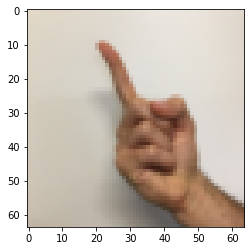

In [15]:
index = 11
plt.imshow(X_train_orig[index])
print("Y = " + str(np.squeeze(Y_train_orig[:,index])))

In [16]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T #每一列就是一个样本
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T

#归一化数据
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

#转换为独热矩阵
Y_train = tf_utils.convert_to_one_hot(Y_train_orig,6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig,6)

print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))

训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


In [17]:
def create_placeholders(n_x,n_y):
    """
    为TensorFlow会话创建占位符
    参数：
        n_x - 一个实数，图片向量的大小（64*64*3 = 12288）
        n_y - 一个实数，分类数（从0到5，所以n_y = 6）
    
    返回：
        X - 一个数据输入的占位符，维度为[n_x, None]，dtype = "float"
        Y - 一个对应输入的标签的占位符，维度为[n_Y,None]，dtype = "float"
    
    提示：
        使用None，因为它让我们可以灵活处理占位符提供的样本数量。事实上，测试/训练期间的样本数量是不同的。
    
    """
    
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    
    return X, Y

In [18]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_3:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


In [20]:
W1 = tf.get_variable("W1", [25,12288], initializer =  tf.truncated_normal_initializer(stddev=0.1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())

In [22]:
def initialize_parameters():
    """
    初始化神经网络的参数，参数的维度如下：
        W1 : [25, 12288]
        b1 : [25, 1]
        W2 : [12, 25]
        b2 : [12, 1]
        W3 : [6, 12]
        b3 : [6, 1]
    
    返回：
        parameters - 包含了W和b的字典
    
    
    """
    
    tf.set_random_seed(1) #指定随机种子
    
    W1 = tf.get_variable("W1",[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [23]:
tf.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形。 

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

AttributeError: module 'tensorflow_core.compat.v1' has no attribute 'contrib'